# <font color="#3A40A2">📘 Algoritmos avanzados de clustering - Parte práctica </font>

**Materia: Ciencia de Datos aplicada a los Negocios - Universidad de San Andrés**

**Autor: [Lucas BALDEZZARI](https://www.linkedin.com/in/lucasbaldezzari/)**

**2025**

> Este material es para fines educativos y no debe ser utilizado para fines comerciales. El contenido pertenece a la *Universidad de San Andrés* y no debe ser reproducido sin el permiso explícito de la institución y del autor de este repositorio quien es [LUCAS BALDEZZARI](https://www.linkedin.com/feed/).

---



## <font color="#004eb3">Temas de la Colab</font>

Para esta clase, los temas que veremos son:

- Limitaciones K-means y K-medoids
- DBSCAN
- Clustering Jerárquico
- Concepto de Cohesión Intra-cluster
- Métricas avanzadas: Coeficiente de Silueta y Davies Boulding

Es importante prestar atención a los siguientes íconos o emojis que aparezcan a lo largo de la Colab.

- 📘 **Teoría**: Conceptos teóricos.
- 📚 **Lectura**: Material adicional que puedes consultar para profundizar en el tema.
- 📊 **Ejemplo**: Ejemplo para demostrar y/o reforzar conceptos.
- 🔗 **Enlace**: Recursos externos que puedes visitar para obtener más información.
- ❓ **Pregunta**: Preguntas disparadas a lo largo del contenido para reflexionar sobre los ejemplos y conceptos tratados.
- 💻 **Código**: Indica que la celda de abajo es una celda con código y debe ser ejecutada para ver su contenido.

## 📘 <font color="#00b351">Limitaciones de K-means y K-medoids</font>

En la clase anterior hemos repasado [*Algoritmos básico de clustering*](https://colab.research.google.com/drive/1yXs9SUg5eKVicOqqMQ5nUO7yWIzi61bp?usp=sharing) y en esta clase nos enfocaremos en *Algoritmos avanzados de clustering*.

Pudimos ver que tanto k-means como k-medoids son dos algoritmos de clustering que buscan agrupar datos en función de la distancia de cada punto a su centroide más cercano. En primer lugar, en k-means , cada centroide se calcula como el promedio de todos los puntos asignados a ese cluster, mientras que en k-medoids , el centroide es un punto real del dataset que minimiza la distancia total a todos los puntos del cluster. Esto último hacia de k-medoids un algoritmo más robusto frente a outliers, ya que el centroide no se ve afectado por valores extremos.

En todo caso, ambos algoritmos son sencillos de aplicar, y sin embargo, son muy robustos para encontrar grupos, siempre y cuando los datos se agrupen con formas circulares o estructuras similares a esta.

Sin embargo, **¿qué pasa si los datos tienen formas más complejas o si contienen ruido?** Aquí es donde entran en juego los algoritmos de clustering basados en densidad, como DBSCAN (Density-Based Spatial Clustering of Applications with Noise). DBSCAN es capaz de identificar clusters de forma arbitraria y también puede manejar ruido de manera efectiva.

#### 📊 **<font color="#d6b302">K-means no es bueno agrupando datos no circulares</font>**

Veamos un ejemplo en donde K-means falla en agrupar datos no circulares.

💻 Importando librerías 💻

Primero, vamos a importar todas las librerías necesarias. Por favor, ejecuta la celda de código de abajo.

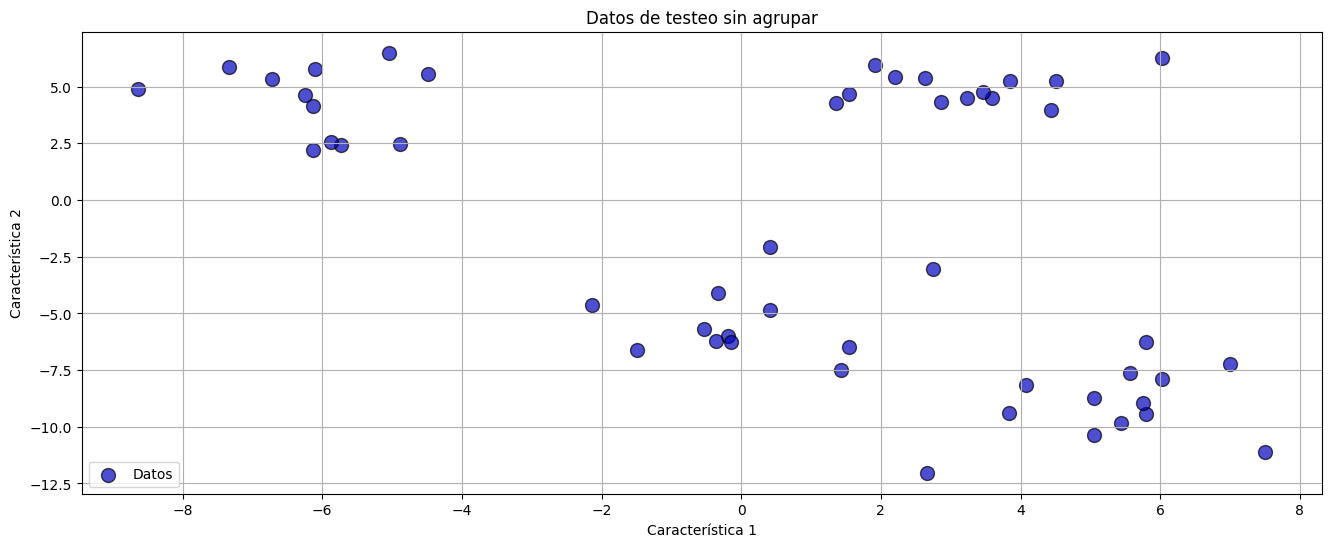

In [1]:
## **** CÓDIGO PYTHON ****

##Clonamos el repositorio para poder usar las funciones
## Esperar unos segundos hasta ver un 100% de descarga
# !git clone https://github.com/lucasbaldezzari/cdan.git

##importamos las funciones a usar
from funciones.avanzados_ans import *
# from funciones.utils import * ##importo funciones a usar


💻 Primer vistazo a nuestros datos 💻

Como siempre, lo primero es empezar analizando nuestros datos. Ahora lo que vamos a hacer es visualizar los datos (que son ficticios) para entender mejor su distribución y características antes de aplicar cualquier algoritmo de clustering.

Por favor, ejecuta la siguiente celda para visualizar los datos.

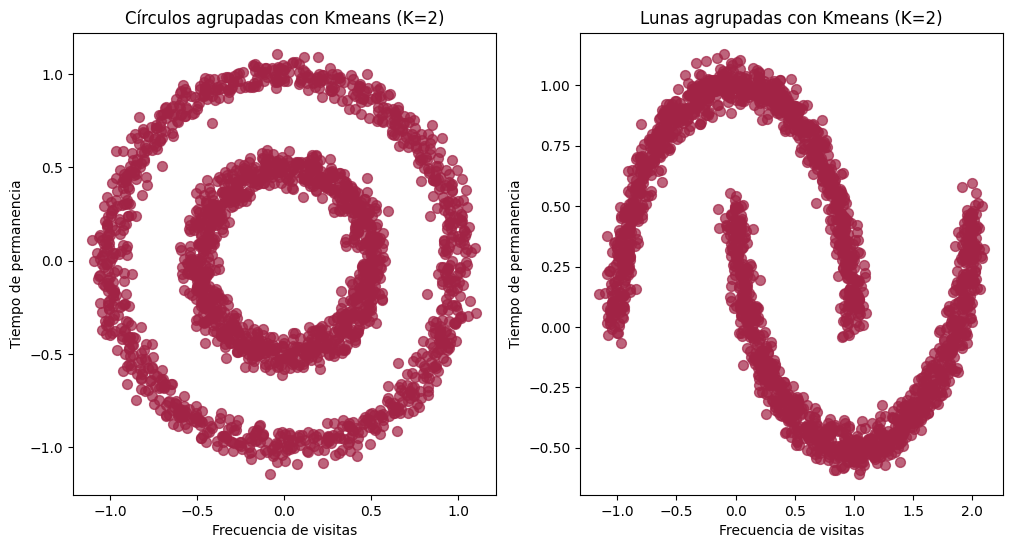

In [2]:
showDataKmeans()

---❓--- 

En base a las figuras anteriores,

1. ¿Podrías decir cómo agruparía los datos K-means para un $K=2$ para los datos circulares? ¿Y para los datos de lunas?
2. Si crees que falla en dividir los datos, ¿a qué atribuís el fallo de K-means en estos casos?

---❓--- 

💻 Agrupando con K-means 💻

A continuación vamos a agrupar los datos utilizando K-means. Iniciaremos con $K=2$.

Por favor, ejecuta la siguiente celda para agrupar los datos.

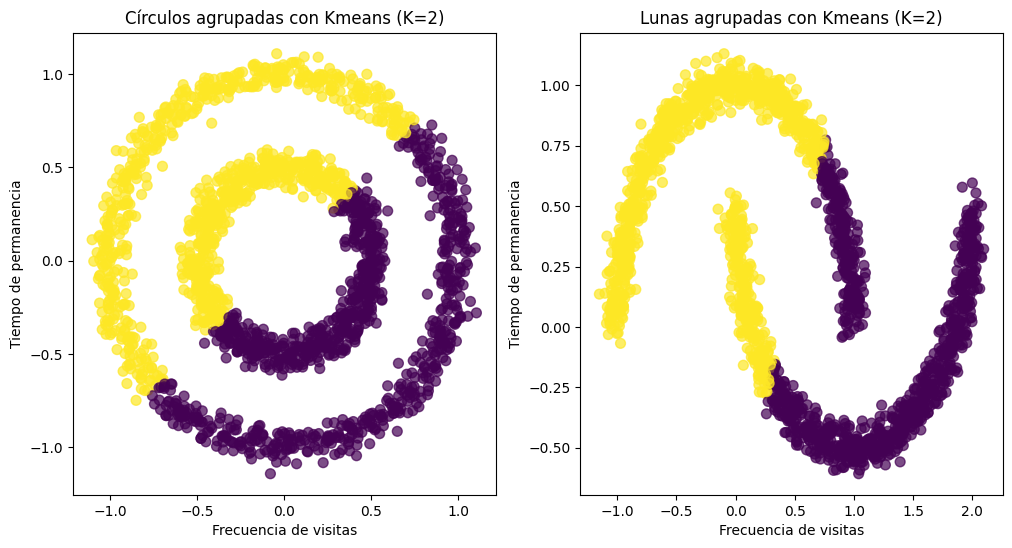

In [3]:
K=2
showDataKmeans(K=K,showGrupos=True)

---❓--- 

Es evidente que K-means tiene dificultades para separar este tipo de datos. Lo mismo pasaría con K-medoids. Ahora bien,

1. ¿Qué pasaría si aumentas el número de $K$? Proba modificando $K$ en la celda anterior.
2. ¿Donde crees qué están ubicados los centroides para los datos en anillo? ¿Y para los datos de lunas?

---❓--- 

💻 Graficando los centroides 💻

Ahora vamos a graficar los datos con los centroides. Por favor, ejecuta la siguiente celda para visualizar los resultados.

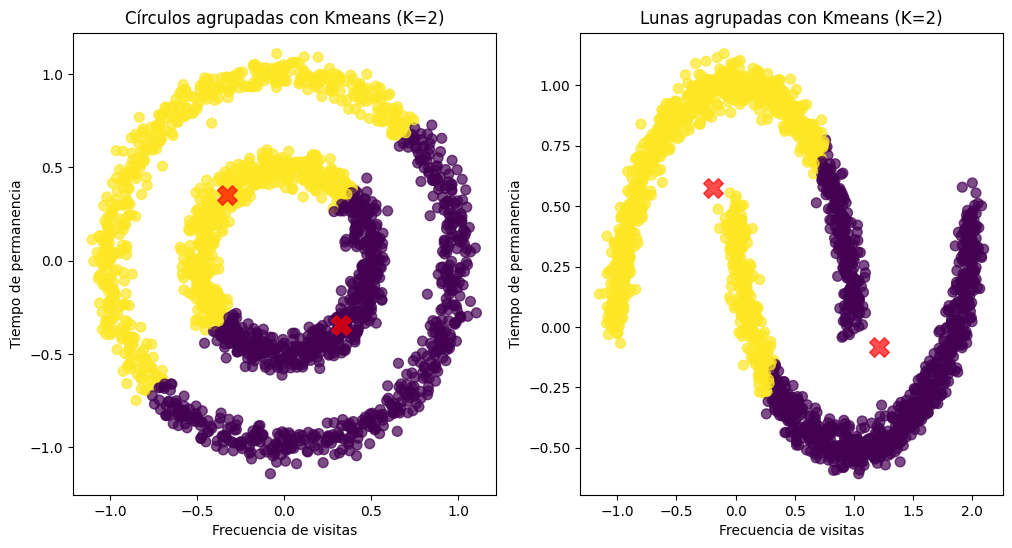

In [4]:
K=2
showDataKmeans(K=K,showGrupos=True, showCentroides=True)

---❓--- 

1. ¿Están los centroides donde pensaste que iban a estar? Si la respuesta es negativa, ¿por qué crees que ocurrió esto?

---❓--- 

## 📘 <font color="#00b351">DBSCAN </font>

DBSCAN es un algoritmo de clustering del tipo no supervisado el cual agrupa puntos en función de su densidad. Fue propuesto por [Ester et al. en 1996](https://file.biolab.si/papers/1996-DBSCAN-KDD.pdf). A diferencia de K-means, no requiere que especifiques el número de clusters de antemano. En su lugar, DBSCAN identifica áreas de alta densidad y las utiliza para formar clusters.

El objetivo de DBSCAN es detectar grupos de *cualquier forma*, incluyendo agrupamientos con ruidos o puntos aislados (outliers).

> <font color="#00b38c">Podemos usar DBSCAN cuando tenemos patrones irregulares y densos, separados por zonas de baja densidad.</font>


Nos sirve para:


- Agrupar datos con formas arbitrarias (no solo esféricas).

- Identificar ruido/outliers sin pasos adicionales.- 

- Es útil cuando:

    - No conoces el número de clústeres.

    - Los clústeres no son linealmente separables $^1$.

    - Hay datos con ruido significativo.

- Ejemplos en business analytics:

    - Segmentación de clientes con comportamientos muy variados.

    - Detección de fraudes (transacciones atípicas).

    - Agrupación de ubicaciones geoespaciales.

    - Análisis de patrones de consumo.

$^1$ Los clústeres no son linealmente separables significa que no se pueden dividir con una línea recta en un espacio de características. Esto es especialmente relevante en conjuntos de datos de alta dimensión, donde las relaciones entre las características pueden ser complejas y no lineales. Por ejemplo, si los puntos están distribuidos en formas como anillos, espirales o medias lunas entrelazadas, ninguna línea recta puede separarlos sin que puntos de un grupo queden mezclados con los del otro, es decir, una línea recta en datos de lunas o anillos (como el ejemplo que hemos visto más arriba) va a cortar ambas medialunas o ambos anillos.

💻 Comparando K-means y DBSCAN 💻

Por favor, ejecuta la celda a continuación para ver la comparación entre K-means y DBSCAN en diferentes conjuntos de datos.

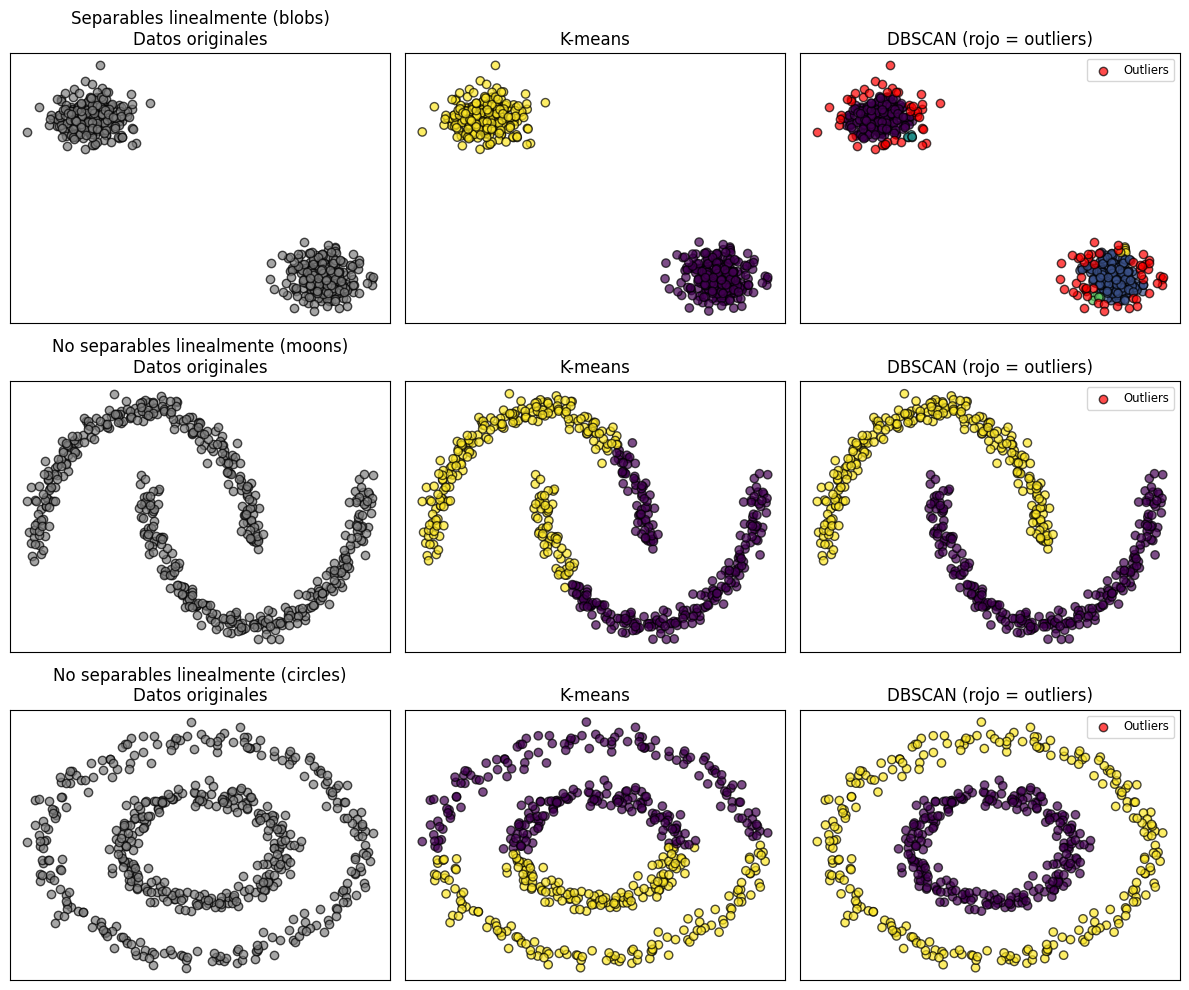

In [5]:
plotComparativa()

De las figuras atneriores podemos mencionar algunas cosas:

1. Como ya hemos visto, K-means no puede separar correctamente los datos con forma de anillos y de media lunas.
2. En el caso de los grupos con forma esférica o circular (primera hilera) vemos que K-means logra identificar los clústeres correctamente, aunque no detecta outliers como sí lo hace DBSCAN.
3. DBSCAN logra identificar la forma de los clústeres de manera más efectiva, especialmente en datos con ruido o formas no convexas (como los anillos y las lunas).

#### 📘 <font color="#00b351">¿Cómo funciona DBSCAN?</font>

Lo primero que tenemos que entender es qué entiende DBSCAN como clúster.

> <font color="#7a00b3">Un clúster es una región de alta densidad separada de otras por regiones de baja densidad.</font>

##### ¿Cómo funciona el algoritmo?

Primero, debemos recordar dos parámetros clave:

- $\epsilon$ (eps): radio de vecindad para considerar puntos cercanos.
- *minPts*: número mínimo de puntos en una vecindad para que se considere “denso”.

Luego, algunos conceptos básicos.

- Punto núcleo (core point): tiene al menos *minPts* dentro de su vecindad $\epsilon$, incluyendo el propio punto.
- Punto borde (border point): no cumple *minPts*, pero está dentro de la vecindad de un punto núcleo.
- Ruido (noise point): no es núcleo ni borde.

Con esto en mente, podemos entender cómo funciona el algoritmo:

Para un punto no visitado:

1. Se encuentran todos los puntos en su vecindad de radio $\epsilon$.
2. Si hay al menos *minPts*, es un punto núcleo y se inicia un nuevo clúster y añade todos los puntos alcanzables (densidad-conectados).
3. Si no, se lo marca como ruido (puede ser reclasificado si luego se encuentra cerca de otro núcleo).
4. Repite hasta visitar todos los puntos.

#### 📊 **<font color="#d6b302">Agrupando círculos con DBSCAN</font>**

Utilizaremos los datos en anillo para evaluar el funcionamiento de DBSCAN.

💻 Graficando datos en anillos 💻

Empecemos con datos en anillos, por favor, ejecuta la celda a continuación para ver los datos sin agrupar.

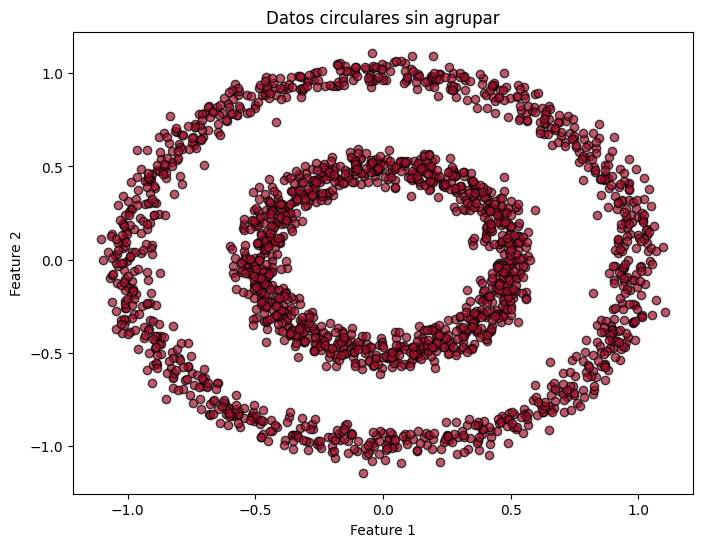

In [6]:
circlesWithDBSCAN(title = "Datos circulares sin agrupar", figsize=(8, 6))

La gráfica anterior nos muestra gráficos en anillos. Es evidente que por la forma en que de distribuyen los datos tenemos diferentes densidades en cada anillo, y por ende, podemos decir que tenemos dos grupos bien diferenciados.

💻 Agrupando con DBSCAN 💻

Ahora vamos a agrupar usando DBSCAN, por favor, ejecuta la celda a continuación.

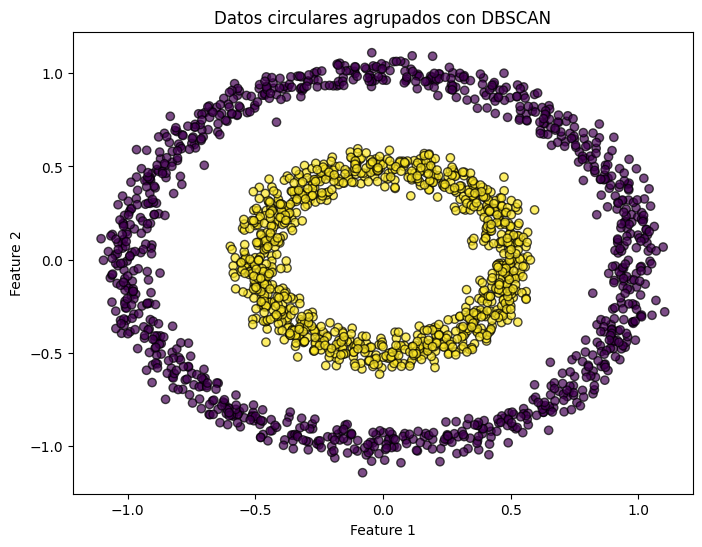

In [7]:
epsilon = 0.2 #distancia máxima entre puntos en un clúster
min_points = 5 #mínimo de puntos para formar un clúster
circlesWithDBSCAN(epsilon=epsilon, min_points=min_points, title = "Datos circulares agrupados con DBSCAN", 
                  showClustering=True, figsize=(8, 6))

💻 Modificando el valor de $epsilon$ 💻

Podemos ver que DBSCAN agrupa correctamente para los valores de $epsilon = 0.2$ y $min\_points = 5$. Podemos preguntarnos, ¿qué pasa si modificamos alguno de estos valores?

Ejecuta la siguiente celda para ver qué sucede cuando se cambia el valor de $epsilon$.

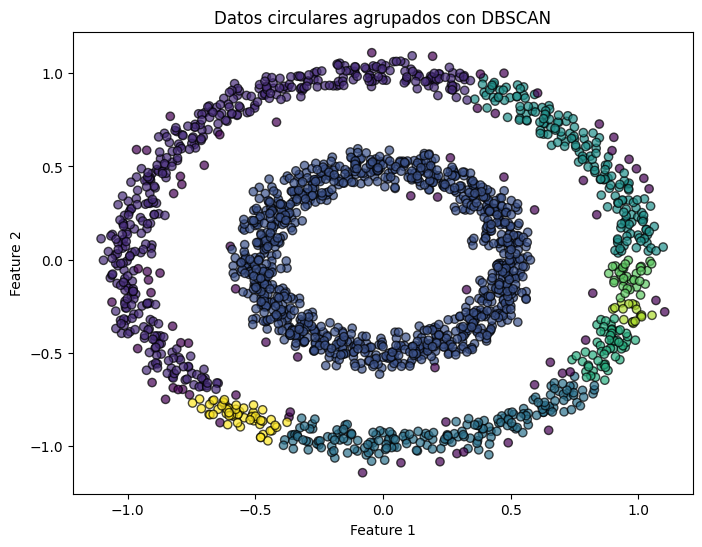

In [8]:
epsilon = 0.05 #distancia máxima entre puntos en un clúster
min_points = 5 #mínimo de puntos para formar un clúster
circlesWithDBSCAN(epsilon=epsilon, min_points=min_points, title = "Datos circulares agrupados con DBSCAN", 
                  showClustering=True, figsize=(8, 6))

---❓--- 

En base al gráfico anterior, y habiendo visto cómo funciona el algoritmo DBSCAN, ¿por qué crees que se ha agrupado de manera diferente con el nuevo valor de $epsilon$?

---❓--- 

💻 Datos ruidosos 💻

Puede darse el caso en donde tengamos datos **ruidosos**, en tales situaciones, DBSCAN puede verse afectado. Los puntos ruidosos pueden ser considerados como ruido y, por lo tanto, no se agrupan en clústeres, o bien, la agrupación puede ser menos efectiva.

Ejecuta la siguiente celda para ver datos circulares ruidosos, es decir, con más dispersión.


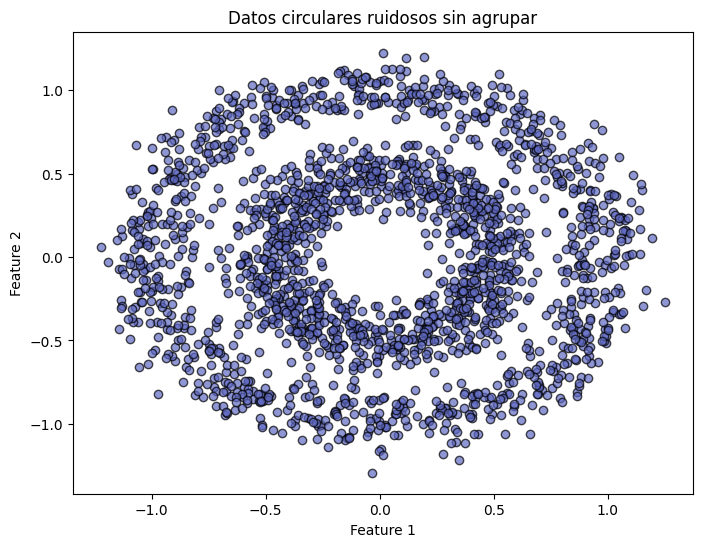

In [9]:
circlesNoisyWithDBSCAN(title = "Datos circulares ruidosos sin agrupar", figsize=(8, 6))


💻 Datos ruidosos 💻

Podemos ver que a diferencia del primer gráfico de datos circulares, ahora tenemos datos más dispersos. Veamos cómo DBSCAN maneja esta dispersión en los datos.

Usaremos los valores de $epsilon$ y $min\_points$ que usamos al principio para ver qué sucede.

Por favor, ejecuta la siguiente celda para ver cómo agrupa DBSCAN esta nueva distribución en los datos.

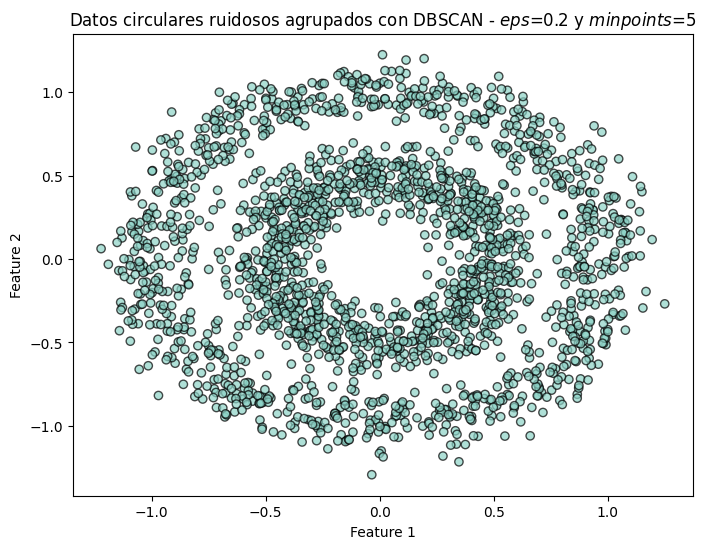

In [10]:
epsilon = 0.2 #distancia máxima entre puntos en un clúster
min_points = 5 #mínimo de puntos para formar un clúster
circlesNoisyWithDBSCAN(epsilon=epsilon, min_points=min_points, title = f"Datos circulares ruidosos agrupados con DBSCAN - $eps$={epsilon} y $min points$={min_points}", 
                  showClustering=True, figsize=(8, 6))

---❓--- 

1. ¿Cuántos grupos hay?
2. ¿Por qué crees que DBSCAN ha agrupado los datos de esta manera?

---❓--- 

💻 Modificando $epsilon$ y $min\_points$ 💻

Vamos a modificar los valores de $epsilon$ y $min\_points$ para ver cómo afecta esto al agrupamiento de los datos ruidosos. Por favor, ejecuta la siguiente celda.

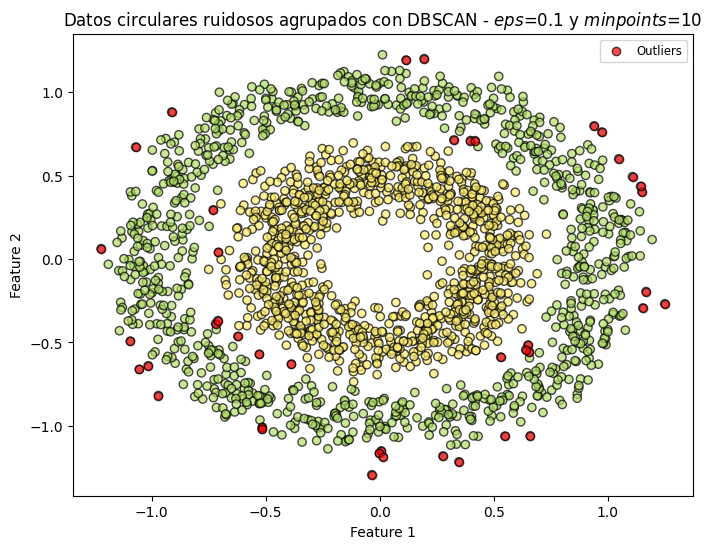

In [11]:
epsilon = 0.1
min_points = 10
circlesNoisyWithDBSCAN(epsilon=epsilon, min_points=min_points,
                       title = f"Datos circulares ruidosos agrupados con DBSCAN - $eps$={epsilon} y $min points$={min_points}",
                       figsize=(8, 6), showClustering=True, showOutliers=True)

---❓--- 

Podemos ver que con los datos nuevos de $epsilon=0.1$ y $min\_points=10$ el agrupamiento mejora. **Incluso podemos ver outliers.**

1. ¿Por qué crees que se ven outliers en este caso?
2. ¿Podríamos decir que todos los outliers son correctos?
3. ¿Qué criterio utilizarías para determinar si un outlier marcado por DBSCAN es relevante o no?

---❓--- 

#### 📊 **<font color="#d6b302">Datos reales</font>**

Vamos ahora a aplicar DBSCAN a un set más parecido a la realidad.

Hemos visto como DBSCAN puede identificar grupos de puntos densos y separar los outliers. Ahora, aplicaremos este algoritmo a un conjunto de datos que emula un escenario del mundo real.

Las columnas dentro del set de datos, son:

- Cantidad promedio de visitas diarias al producto (popularidad)
- Precio en USD del producto
- Unidades vendidas por mes
- Valoración media de usuarios (1 a 5)

💻 Analizando los datos sin agrupar 💻

Vamos a revisar cómo se distribuyen los datos en un gráfico de dispersión. Utilizaremos columnas diferentes para poder comparar las relaciones entre las variables.

En este primer caso, vamos a comparar las columnas, *media_visitas_diarias* y *unidades_vendidas_mensuales*. Por favor, ejecuta la siguiente celda.


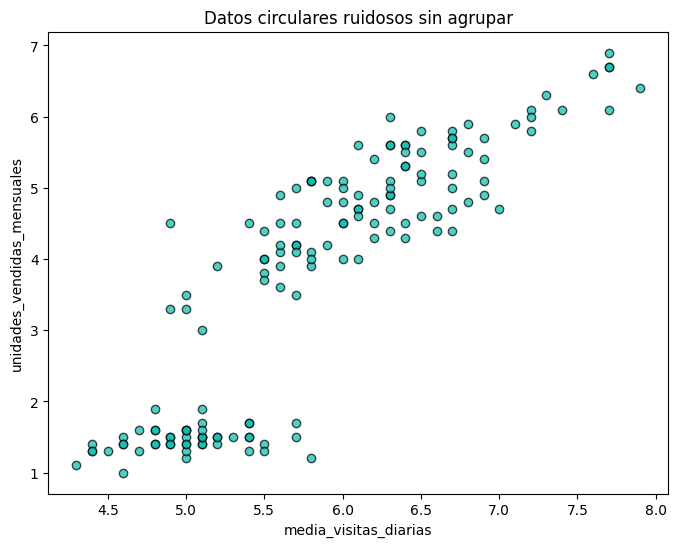

In [12]:
columna1="media_visitas_diarias"
columna2="unidades_vendidas_mensuales"

realdataWithDBSCAN(columnasInteres = [columna1,columna2], figsize=(8, 6))

Ahora vamos a comparar las columnas, *media_visitas_diarias* y *precio_unitario*. Por favor, ejecuta la siguiente celda.

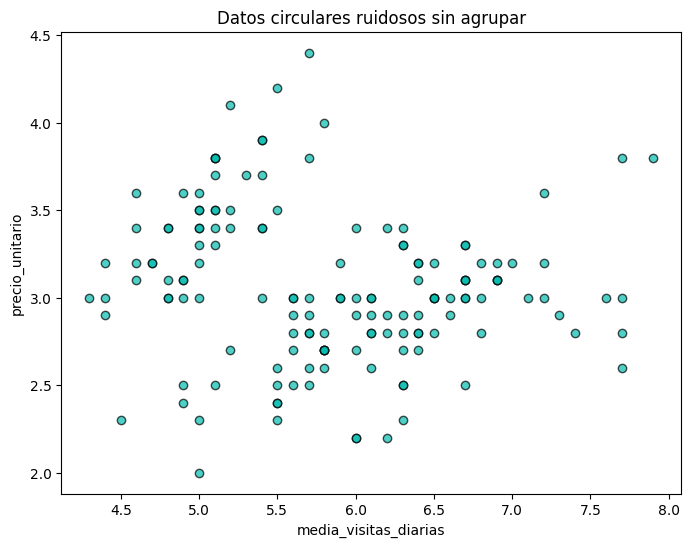

In [13]:
columna1="media_visitas_diarias"
columna2="precio_unitario"
realdataWithDBSCAN(columnasInteres = [columna1,columna2], figsize=(8, 6))

---❓--- 

Podemos ver que con los datos nuevos de $epsilon=0.1$ y $min\_points=10$ el agrupamiento mejora. **Incluso podemos ver outliers.**

1. ¿Por qué se ve diferente la distribución de los datos?
2. ¿Cuál de los dos gráficos anteriores te prece mejor para visualizar la cantidad de grupos?
3. ¿Cuántos grupos crees que tiene el set de datos analizando las gráficas?

---❓--- 

##### 📊 **<font color="#d6b302">Agrupando con DBSCAN</font>**

Ahora usemos DBSCAN para agrupar este nuevo se de datos. Vamos a usar las columnas *media_visitas_diarias* y *unidades_vendidas_mensuales* para agrupar. Además, usaremos $epsilon=0.5$ y $min\_points=5$.

Por favor, ejecuta la siguiente celda para ver los resultados del agrupamiento.

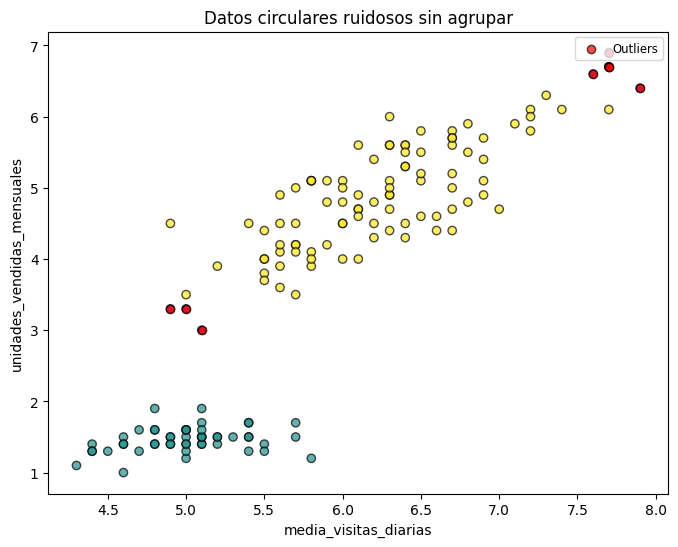

In [14]:
columna1="media_visitas_diarias"
columna2="unidades_vendidas_mensuales"

epsilon = 0.5
min_points = 8

realdataWithDBSCAN(epsilon=epsilon, min_points=min_points,
                   columnasInteres = [columna1,columna2], figsize=(8, 6), showClustering=True, showOutliers=True)

---❓--- 

1. ¿Crees que DBSCAN ha hecho una buena agrupación?
2. ¿Estás de acuerdo con los outliers que ha detectado DBSCAN?

---❓--- 

💻 Usando diferentes columnas 💻

Al parecer, la agrupación parece estar bien.

Sin embasrgo, ¿qué pasaría si cambiamos las columnas que estamos usando para agrupar? Por ejemplo, podríamos usar *media_visitas_diarias* y *precio_unitario* en lugar de las anteriores.

Ejecuta la siguiente celda para ver cómo cambia la agrupación con estas nuevas columnas.

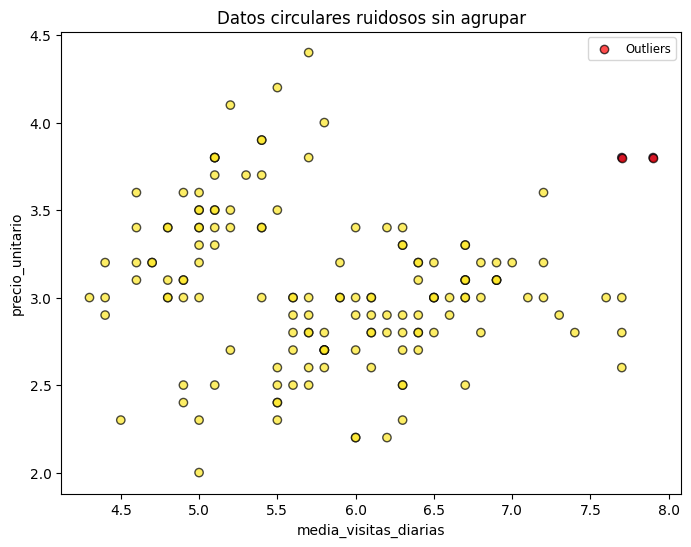

In [15]:
columna1="media_visitas_diarias"
columna2="precio_unitario"

epsilon = 0.5
min_points = 6

realdataWithDBSCAN(epsilon=epsilon, min_points=min_points,
                   columnasInteres = [columna1,columna2], figsize=(8, 6), showClustering=True, showOutliers=True)

---❓--- 

1. ¿Crees que DBSCAN ha hecho una buena agrupación?
2. ¿Estás de acuerdo con los outliers que ha detectado DBSCAN?
3. ¿Usarías K-means en vez de DBSCAN? ¿Por qué?

---❓--- 

#### 📘 <font color="#00b351">Clustering jerárquico</font>

Los **algoritmos jerárquicos** de agrupamientos nos **permiten construir estructuras en forma de árbol llamados *dendograma*** para organizar los datos en niveles de agrupamientos.

Son útiles cuando necesitamos entender las relaciones entre los datos a diferentes escalas y niveles estructurales.

Un dendograma sirve para:

- Reconocer la estructura jerárquica de los datos
- En qué orden se agruparon los elementos.
- A qué nivel (distancia) se fusionaron los clústeres.

Encontramos dos formas básicas de aplicar este tipo de algoritmo, a saber:

| Método     | Nombre       | Descripción                                                                 |
|------------|--------------|------------------------------------------------------------------------------|
| Ascendente | Aglomerativo | Cada punto es un clúster individual y se los va fusionando.                 |
| Descendente| Divisivo     | Se parte de todos los puntos como un gran clúster y se los divide recursivamente|

Con cualquiera de los dos métodos, el resultado es el mismo -siempre y cuando la **distancia** utilizada para fusionar o dividir los clústeres sea la misma-.

##### 📊 **<font color="#d6b302">Usando clustering Jerárquico - Set de datos 1</font>**

Vamos a aplicar clustering jerárquico a un set de datos sintético. La idea es poder aplicar los conceptos vistos durante la teoría.

Por favor, ejecutá la celda debajo para visualizar los datos.

NOTA: Si quisieras ver los grupos verdaderos, puedes activar la opción *show_true_groups* haciendola igual a *True*.

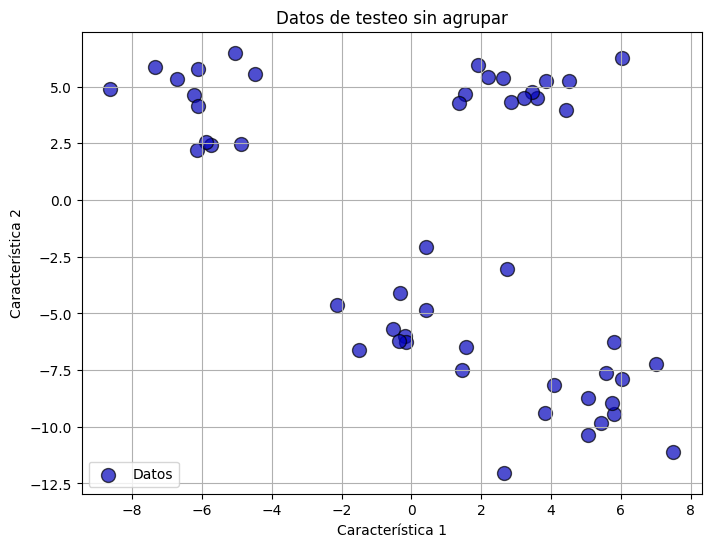

In [16]:
dendo1stExample(show_blobs=True, figsize=(8, 6), show_true_groups=False)

💻 Generando dendograma 💻

Vamos a generar un dendograma usando los datos anteriores, por favor, ejecuta la celda de abajo.

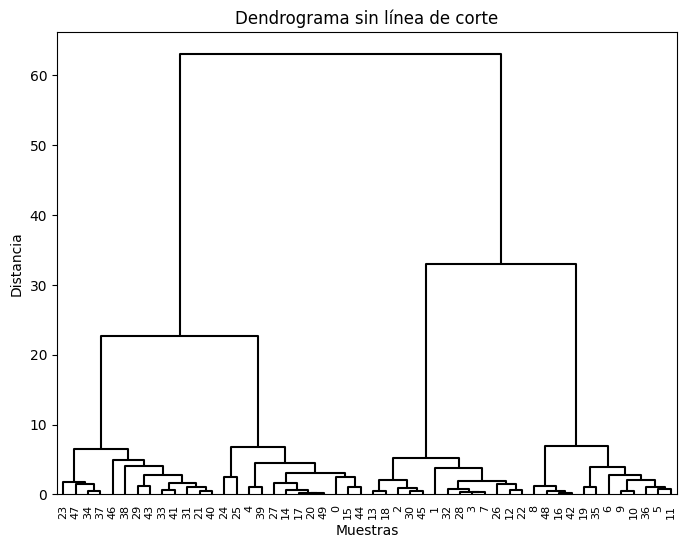

In [17]:
dendo1stExample(show_dendo=True, show_blobs=False, figsize=(8, 6))

La cantidad de observaciones que tiene nuestro set de datos es de $50$, es decir, tenemos 50 puntos. Ahora bien, hemos obtenido un dendograma ascendente, que como sabemos, genera una matriz de distancias entre todos los puntos y empieza a agruparlos desde abajo hacia arriba. El eje $y$ del dendograma representa la distancia o disimilitud entre los grupos que se están uniendo.

Podemos pensar que a medida que *"subimos"* en el arbol empezamos a agrupar los puntos en clústeres, o dicho de otra manera, en base a la similitud entre ellos. Esto significa que los puntos que están más cerca en el espacio de características se agruparán primero, mientras que los puntos más distantes se unirán en etapas posteriores.

---❓--- 

1. ¿Cuántos grupos crees que hay?
2. ¿Donde colocarías el umbral para cortar el arbol y por qué?

---❓--- 

💻 Seleccionando el umbral y agrupando 💻

En este paso, seleccionaremos un umbral para poder agrupar. Para esto, reemplaza el valor de **umbral** que dice *None* de la celda de abajo por un número que creas conveniente. Recorda que el umbral representa la distancia máxima entre puntos para que sean considerados parte del mismo grupo. Es una línea horizontal en el dendrograma.

Por favor, ajusta el valor de `umbral` en la celda de abajo y ejecuta la celda para ver cómo cambia el agrupamiento.

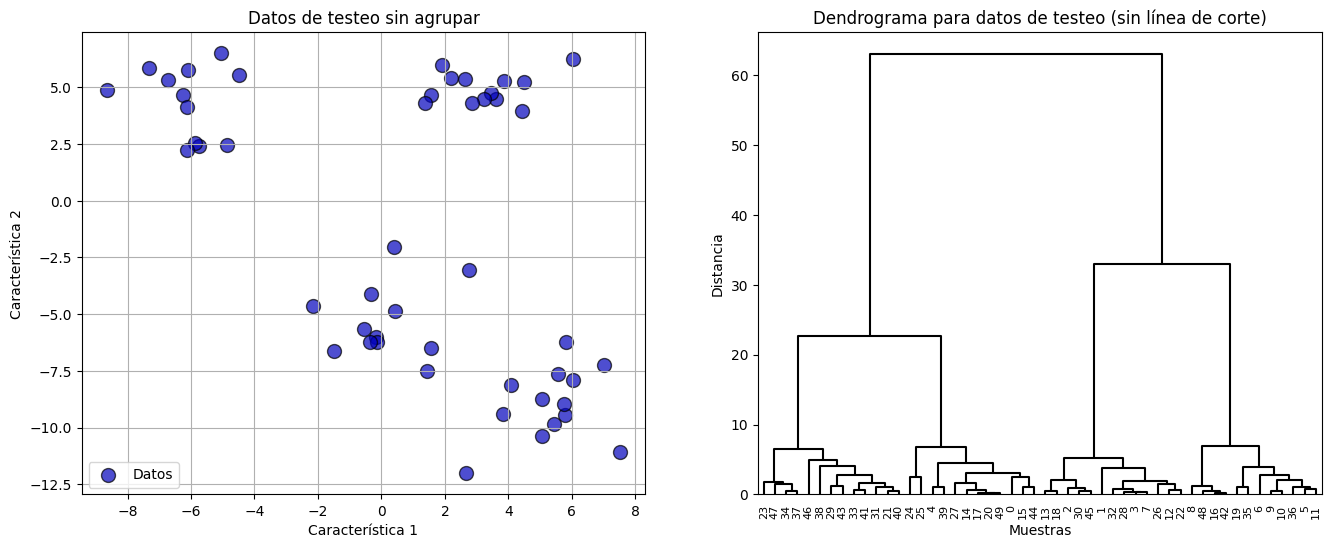

In [25]:
umbral = None
dendo1stExample(show_blobs=True, show_dendo=True, umbral_corte=umbral)

---❓--- 

1. En base al umbral que elegiste, ¿crees que los grupos están bien definidos?
2. ¿Qué cambios harías en el umbral para mejorar la agrupación?
3. ¿Qué pasa si el umbral es $0$, y si es $80$? ¿Tiene sentido lo que sucede en cada caso?

---❓--- 

<h3 style="color:rgb(9, 170, 111);">Cohesión intra-grupo</h3>

La **cohesión entre grupos**, también conocida como **similitud dentro del grupo**, se refiere a *que tan bien se agrupan los puntos de un clúster*.

> Baja distancia intra-grupo implica alta cohesión, y viceversa.

En nuestro contexto, <span style="background-color:rgb(236, 230, 77); color: black">**mayor cohesión, significa mayor similitud entre los datos**</span>.

---
<h3 style="color:rgba(9, 12, 1701);">FIN</h3>

---

### 🔗 <font color="#1bb300">Para reforzar</font> 🔗

Para las personas que quieran reforzar o complementar lo visto en clase pueden acceder a los siguientes links:

1. [DBSCAN - Statquest](https://www.youtube.com/watch?v=RDZUdRSDOok&ab_channel=StatQuestwithJoshStarmer)
2. [DBSCAN - Wikipedia](https://en.wikipedia.org/wiki/DBSCAN)

<font color="#a23a3a">**IMPORTANTE: El material de *refuerzo* no será evaluado**</font>

---

## <font color="#3A40A2">📘 Material complementario </font>

A continuación se deja material complementario para entender cómo se calculan las métricas que hemos visto en clase de teoría y práctica.

<font color="#a23a3a">**IMPORTANTE: Este material no será evaluado**</font>

<h3 style="color:rgb(9, 170, 111);">Cuantificando la distancia entre grupos</h3>

Existen diferentes formas de cuantificar la cohesión dentro de cada clúster, entre estas encontramos:

**<div style="text-align: center;">1. Single Linkage Distance</div>**

Es la distancia más cercana entre dos objetos que pertenecen a diferentes clústeres. En otras palabras, es la distancia entre el par de puntos más cercanos de dos clústeres distintos.

Se calcula como:

$$ \delta_{1}(C_i, C_j) = \min_{x \in C_i, y \in C_j} d(x, y) $$

Donde $C_i$ y $C_j$ son los clústeres, $x$ es un punto en el clúster $C_i$, $y$ es un punto en el clúster $C_j$, y $d(x, y)$ es la distancia entre los puntos $x$ e $y$.

**<div style="text-align: center;">2. Complete Linkage Distance</div>**

Es la distancia más lejana entre dos objetos que pertenecen a diferentes clústeres. En otras palabras, es la distancia entre el par de puntos más distantes de dos clústeres distintos.

Se calcula como:
$$ \delta_{2}(C_i, C_j) = \max_{x \in C_i, y \in C_j} d(x, y) $$

Donde $C_i$ y $C_j$ son los clústeres, $x$ es un punto en el clúster $C_i$, $y$ es un punto en el clúster $C_j$, y $d(x, y)$ es la distancia entre los puntos $x$ e $y$.

**<div style="text-align: center;">3. Average Linkage Distance</div>**

Esta distancia se calcula como el promedio de las distancias entre todos los pares de puntos de dos clústeres distintos.

Se calcula como:
$$ \delta_{3}(C_i, C_j) = \frac{1}{|C_i| \cdot |C_j|} \sum_{x \in C_i} \sum_{y \in C_j} d(x, y) $$

Donde $C_i$ y $C_j$ son los clústeres, $|C_i|$ y $|C_j|$ son el número de puntos en los clústeres $C_i$ y $C_j$, respectivamente, $x$ es un punto en el clúster $C_i$, $y$ es un punto en el clúster $C_j$, y $d(x, y)$ es la distancia entre los puntos $x$ e $y$.

**<div style="text-align: center;">4. Centroid Linkage Distance</div>**

Es la distancia entre los centros de dos clústeres.

Se calcula como:
$$ \delta_{4}(C_i, C_j) = d(\mu(C_i), \mu(C_j)) $$

Con $\mu(C_i)$ y $\mu(C_j)$ representando los centros de los clústeres $C_i$ y $C_j$, respectivamente, y $d(\mu(C_i), \mu(C_j))$ es la distancia entre los centroides.

$\mu(C_i)$ y $\mu(C_j)$ se definen como:
$$ \mu(C_i) = \frac{1}{|C_i|} \sum_{x \in C_i} x , \quad \mu(C_j) = \frac{1}{|C_j|} \sum_{y \in C_j} y $$

**<div style="text-align: center;">5. Average Centroid Linkage Distance</div>**

Es la distancia entre el centro de un grupo y todos los puntos de otro grupo.

Se calcula como:
$$ \delta_{5}(C_i, C_j) = \frac{1}{|C_i|+|C_j|} \left\{ \sum_{x \in C_i} d(x, \mu(C_j)) + \sum_{y \in C_j} d(y, \mu(C_i)) \right\} $$

<h3 style="color:rgb(9, 170, 111);">Formas de cuantificar la distancia intra-grupo</h3>

De forma general, la distancia intra-grupo se puede cuantificar de las siguientes formas:

**<div style="text-align: center;">Complete Diameter Distance</div>**

Es la distancia máxima entre dos puntos dentro del mismo grupo. Se calcula como la distancia entre el par de puntos más alejados dentro del clúster.

Sea $C$ un clúster con $n$ puntos, $\{x_1,x_2,...,x_n\}$, entonces,

$$ D_{complete}(C) = \max_{i,j} d(x_i, x_j) $$

Donde $d(x_i, x_j)$ es la distancia entre los puntos $x_i$ y $x_j$, usualmente la distancia euclidiana.

¿Qué nos dice esta métrica?

- Nos da el diámetro máximo del clúster.
- Refleja qué tan _"extendido"_ está el clúster en su peor caso.
- No es sensible a la forma del clúster, ya que solo considera el par de puntos más alejados.
- **Es sensible a los outliers**, ya que un solo punto muy alejado puede aumentar significativamente el diámetro.

**<div style="text-align: center;">Average Diameter Distance</div>**

Es la distancia promedio entre todos los pares de puntos dentro del mismo grupo.

$$ \text{diam}_2(C) = \frac{1}{n (n - 1)} \sum_{\substack{x, y \in C \\ x \neq y}} d(x, y) $$

Esta formula calcula el **promedio de las distancias entre todos los pares de puntos diferentes entre sí** dentro del clúster. Es útil para entender la cohesión general del clúster.

- si los puntos están muy juntos, la distancia promedio será baja, indicando alta cohesión.
- si los puntos están muy dispersos, la distancia promedio será alta, indicando baja cohesión o un clúster poco compacto.

Esta métrica,

- Nos da una idea general de la cohesión del clúster.
- Es menos sensible a los outliers que la métrica de diámetro completo, ya que considera todas las distancias entre pares de puntos.
- Es útil para clústeres con formas variadas, ya que promedia las distancias en lugar de enfocarse en el par más alejado.
- Es útil para comparar clústeres de diferentes tamaños, ya que normaliza por el número de puntos.

**<div style="text-align: center;">Centroid Diameter Distance</div>**

Es la distancia entre los centroides de los grupos. Se calcula como la distancia entre el centroide del clúster y cada uno de los puntos dentro del clúster.

Sea $C$ un clúster con $n$ puntos, $\{x_1,x_2,...,x_n\}$, primero calculamos el centroide $c$ del clúster como:

$$ \mu_{C_k} = \frac{1}{n} \sum_{x_i \in C_k}^{} x_i $$

Luego, la intra-clúster es:

$$ D_{centroid}(C_k) = \frac{1}{n} \sum_{x_i \in C_k}^{} d(x_i, \mu_{C_k}) $$